In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [2]:
cd "/content/drive/My Drive/Colab Notebooks/ml-dw-matrix"

/content/drive/My Drive/Colab Notebooks/ml-dw-matrix


In [3]:
ls data

men_shoes.csv


In [5]:
df = pd.read_csv('data/men_shoes.csv', low_memory=False)
df.shape

(18280, 48)

In [6]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [7]:
mean_price = np.mean(df['prices_amountmin'])
mean_price

93.53952188183217

In [11]:
y_true = df['prices_amountmin']
y_pred = [mean_price] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

63.968341227870624

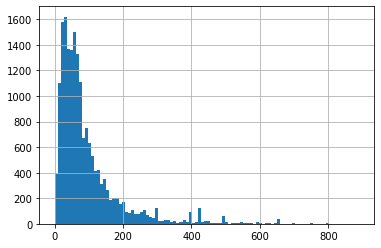

In [12]:
df['prices_amountmin'].hist(bins=100)

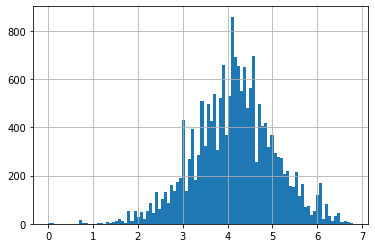

In [14]:
np.log1p(df['prices_amountmin']).hist(bins=100)

In [15]:
y_true = df['prices_amountmin']
y_pred = [np.median(y_true)] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.01120240700219

In [16]:
np.median(y_true)

64.95

In [17]:
y_true = df['prices_amountmin']
price_log_mean = np.expm1(np.mean(np.log1p(y_true)))

y_pred = [price_log_mean] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.03539547661041

In [18]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [20]:
df.brand.value_counts()

Nike               1709
PUMA                574
Ralph Lauren        524
New Balance         361
VANS                356
                   ... 
Hanro                 1
Jockey                1
Louis Raphael         1
ChalkTalkSPORTS       1
HABIT                 1
Name: brand, Length: 1856, dtype: int64

In [0]:
df['brand_cat'] = df['brand'].factorize()[0]

In [25]:
feats = ['brand_cat']
X = df [feats].values
y = df['prices_amountmin'].values

model = DecisionTreeRegressor(max_depth=5)

scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-58.38655694633361, 4.223555478221712)

In [0]:
feats = ['brand_cat']

def run_model(feats):
  X = df [feats].values
  y = df['prices_amountmin'].values

  model = DecisionTreeRegressor(max_depth=5)

  scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

In [27]:
run_model(['brand_cat'])

(-58.38655694633361, 4.223555478221712)

In [28]:
df['manufacturer_cat'] = df['manufacturer'].factorize()[0]
run_model(['manufacturer_cat'])

(-63.133649278023746, 3.394307434888982)

In [29]:
run_model(['brand_cat', 'manufacturer_cat'])

(-58.53930419908596, 4.311223231615432)

In [30]:
pwd

'/content/drive/My Drive/Colab Notebooks/ml-dw-matrix'

In [31]:
!git status

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   matrix_one/day03.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	day04.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [32]:
!git diff

diff --git a/matrix_one/day03.ipynb b/matrix_one/day03.ipynb
index daa6c48..2cd8101 100644
--- a/matrix_one/day03.ipynb
+++ b/matrix_one/day03.ipynb
@@ -1 +1 @@
-{"nbformat":4,"nbformat_minor":0,"metadata":{"colab":{"name":"day03.ipynb","provenance":[],"collapsed_sections":[],"authorship_tag":"ABX9TyM+pDAz5Oc8IxT3h1Ipz9mi"},"kernelspec":{"name":"python3","display_name":"Python 3"}},"cells":[{"cell_type":"code","metadata":{"id":"sHrEKL2v2YfS","colab_type":"code","colab":{}},"source":["#!pip install datadotworld\n","#!pip install datadotworld[pandas]"],"execution_count":0,"outputs":[]},{"cell_type":"code","metadata":{"id":"hmWrAB2P3f3V","colab_type":"code","colab":{}},"source":["#!dw configure"],"execution_count":0,"outputs":[]},{"cell_type":"code","metadata":{"id":"1sYFh4X829TD","colab_type":"code","colab":{}},"source":["from google.colab import drive\n","import pandas as pd\n","import numpy as np\n","\n","import datadotworld as dw"],"execution_count":0,"outputs":[]},{"cell_type":"code"